# ***PROYECTO DE REGRESIÓN LINEAL SIMPLE APLICADA AL SECTOR EDITORIAL***



## **Introducción**

La regresión lineal simple es un método estadístico que se utiliza para modelar la relación entre una variable dependiente y una variable independiente. En este proyecto, se utilizará la regresión lineal simple para predecir el rating de un libro en función de su precio.

## **Objetivos**

Los objetivos de este proyecto son los siguientes:

* Aprender a realizar un análisis de regresión lineal simple
* Aplicar la regresión lineal simple para predecir el rating de un libro
* Evaluar la precisión de la predicción

## **Metodología**

Los datos utilizados en este proyecto son los siguientes:

* Precio del libro (en euros)
* Opinión de los usuarios (puntuación de 1 a 10)
* Los datos se han obtenido de [Amazon](https://www.amazon.com/) (precio) y [Goodreads](https://www.goodreads.com/) (opiniones de los usuarios).

Para realizar el análisis de regresión lineal simple, hemos utlizado **Python**, **Pandas**, **Numpy**, **Scikit learn** y **Matplotlib**.

In [ ]:
# Importar librerias Pandas, Matplotlib, Numpy, y Scikit Learn (linear_model)

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model

In [ ]:
# Creación del Dataframe con Pandas

df=pd.read_excel('books.xlsx')
df

,book_title,book_author,publisher_group,binding,book_price,user_rating
0,"Da Vinci Code,The","Brown, Dan",Transworld Grp,Paperback,7.99,3.0
1,Harry Potter and the Philosopher's Stone,"Rowling, J. K.",Bloomsbury Grp,Paperback,6.99,2.5
2,Harry Potter and the Chamber of Secrets,"Rowling, J. K.",Bloomsbury Grp,Paperback,6.99,2.5
3,Angels and Demons,"Brown, Dan",Transworld Grp,Paperback,7.99,3.0
4,Harry Potter and the Order of the Phoenix,"Rowling, J. K.",Bloomsbury Grp,Hardback,16.99,6.5
...,...,...,...,...,...,...
91,"Amber Spyglass,The:His Dark Materials S.","Pullman, Philip",Scholastic Ltd. Grp,Paperback,6.99,2.5
92,Can You Keep a Secret?,"Kinsella, Sophie",Transworld Grp,Paperback,7.99,3.0
93,Down Under,"Bryson, Bill",Transworld Grp,Paperback,8.99,3.5
94,"Spot of Bother,A","Haddon, Mark",Random House Grp,Paperback,7.99,3.0


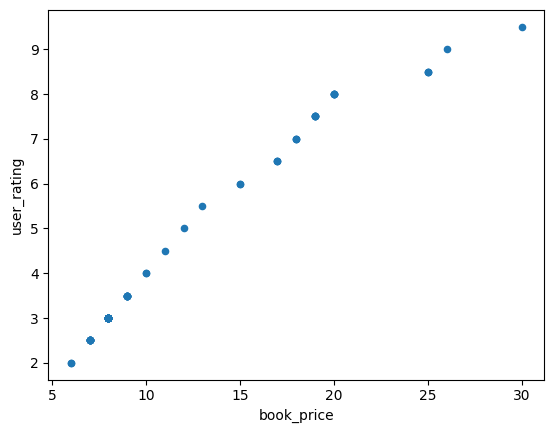

In [ ]:
# Visualización de la data usando Matplotlib

df.plot(kind='scatter', x='book_price', y='user_rating')

plt.show()

Parece que se ve una tendencia que indica que cuanto mayor es el precio del libro, mas satisfecho está el lector.

En base a estos datos, vamos a desarrollar un modelo que nos permita predecir el nivel de satisfaccion de un lector.

Es una tarea de regresión lineal simple, donde hay una variable independiente que se utiliza para prever o explicar la variabilidad de una variable dependiente. La ecuación de regresión lineal simple se puede expresar como:

`y= m*x + b`

*   **y** - La variable dependiente, donde **y** es el rating del usuario
*   **m** - La pendiente de la línea (coeficiente de la variable independiente)
*   **x** - La variable independiente, donde x es el precio del libro
*   **b** - El intercepto

En términos prácticos, el intercepto indica el valor de **y** cuando **x** es igual a cero.

Para entrenar este modelo y darle unos valores a los parametros que son la m y la b, que se ajusten a la tendencia que vemos en la grafica usaremos la libreria de **Scikit Learn**.



In [ ]:
# Creación del modelo de Regresion Lineal usando la librería Sklearn y Numpy

lin1 = linear_model.LinearRegression()

# A continuación, utilizamos np.c_ para concatenar las columnas del DataFrame
# df["book_price"] y df["user_rating"] a lo largo del segundo eje.
# Esto es necesario porque lin1.fit espera que Xsample e ysample sean arreglos bidimensionales
# np.c_ se utiliza para realizar esta concatenación de manera conveniente.

Xsample = np.c_[df["book_price"]] # Variable dependiente
ysample = np.c_[df["user_rating"]] # Variable independiente
lin1.fit(Xsample, ysample)

# Se obtienen los coeficientes de la ecuación de regresión lineal.
# b representa la ordenada al origen (intercepto), y m representa la pendiente de la línea.

b, m = lin1.intercept_[0], lin1.coef_[0][0]

# intercept_[0]:

# Aquí, intercept_ es un array unidimensional. Aunque este array generalmente
# contiene solo un elemento (especialmente en la regresión lineal simple), aún se almacena como un array.
# El uso de [0] es para acceder al primer elemento de este array unidimensional.

# coef_[0][0]:

# En este caso, coef_ es un array bidimensional. Esto se debe a que, incluso en
# una regresión lineal simple, la librería scikit-learn estructura los coeficientes
# para acomodar potencialmente múltiples variables predictoras (en la regresión
# lineal múltiple). El primer [0] accede a la primera fila de este array bidimensional,
# que corresponde a los coeficientes de la primera variable predictora (en regresión
# lineal simple, es la única variable).
# El segundo [0] accede al primer elemento de esta fila, que es el coeficiente de
# la variable predictora en un modelo de regresión lineal simple.

b, m

# Esto significa que el modelo predice el rating del libro en función del precio.
# El intercepto representa el valor estimado del rating del libro cuando el precio es cero, y el
# coeficiente indica el cambio en el rating del usuario por cada unidad de aumento en el precio.

(0.13126319271374243, 0.36560488502426697)

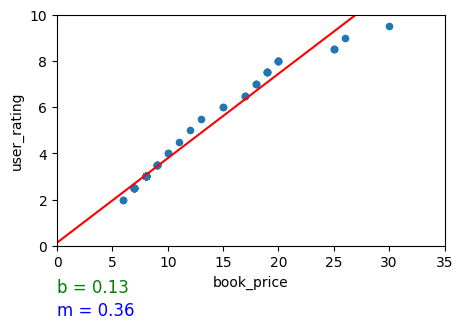

In [ ]:
df.plot(kind='scatter', x="book_price", y='user_rating', figsize=(5,3))
plt.xlabel("book_price")
plt.axis([0, 35, 0, 10])
X=np.linspace(0, 35, 10)
plt.plot(X, b + m*X, "red")
plt.text(0, -2, r"b = 0.13", fontsize=12, color="g")
plt.text(0, -3, r"m = 0.36", fontsize=12, color="b")
plt.show()

In [ ]:
# Ahora vamos a usar nuestro algoritmo para predecir el nivel de satisfaccion del lector de cualquier libro del que sepamos su precio

book_predicted_price = 15.00
book_predicted_rating = lin1.predict([[book_predicted_price]])[0][0]
book_predicted_rating

5.615336468077747

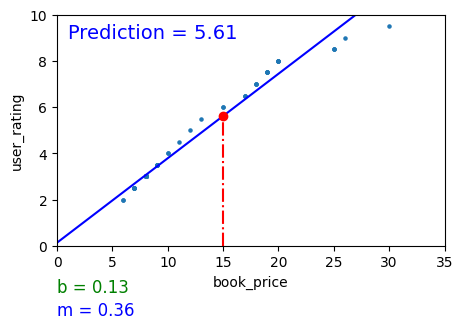

In [ ]:
df.plot(kind='scatter', x="book_price", y='user_rating', figsize=(5,3), s=5)
X=np.linspace(0, 35, 10)
plt.plot(X, b + m*X, "b")
plt.axis([0, 35, 0, 10])
plt.text(0, -2, r"b = 0.13", fontsize=12, color="g")
plt.text(0, -3, r"m = 0.36", fontsize=12, color="b")
plt.plot([book_predicted_price, book_predicted_price], [0, book_predicted_rating], "r-.")
plt.text(1, 9.0, r"Prediction = 5.61", fontsize=14, color="b")
plt.plot(book_predicted_price, book_predicted_rating, 'ro')
plt.show()

## Conclusiones

Los resultados del análisis de regresión lineal simple muestran que existe una relación lineal positiva entre el rating del usuario y el precio del libro. Por lo tanto, el modelo puede utilizarse para predecir la opinión del futuro comprador del libro en función de su precio.

La pendiente de 0.13126319271374243 significa que, para cada aumento de 1 euro en el precio de un libro, la opinión del usuario se espera que aumente en 0.13126319271374243 estrellas.

La intersección de 0.36560488502426697 significa que, si el precio de un libro es 0 euros, la opinión del usuario se espera que sea de 0.36560488502426697 estrellas.

En este caso, la pendiente es positiva, lo que significa que, en general, los usuarios tienden a dar mejores opiniones a los libros más caros. Esto podría deberse a que los libros más caros suelen ser de mayor calidad o que los usuarios esperan más de ellos.

## Recomendaciones

Es importante tener en cuenta que esta es solo una predicción y que no siempre se cumplirá. Hay muchos otros factores que pueden influir en la opinión de un usuario, como la calidad del libro, la relevancia para el usuario o las expectativas del usuario.

En base a esto, se podría utilizar un modelo de regresión lineal múltiple, que permite incluir más de una variable independiente en el modelo.